# **Import Libraries**
Imorting all Libraries to be Used on the Source code

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

#libraries for Classification Model in Supervised Learning Algorithm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
#libraries for Decistion Tree Algorithm
from sklearn.tree import DecisionTreeClassifier


# **LOAD DATASET TO THE DATA FRAME**

Read Data File from CSV file

In [3]:
dataset_dataframe= pd.read_csv("/content/SKYWARDS_DATA_dataset.csv",encoding="latin-1")

# **Checking Dataset Schema**

Take note: those **Object** Datatype will be later changed to int by astype function

In [4]:
dataset_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 28 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Ref                                103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Satisfied                          103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Age Band                           103904 non-null  object 
 6   Type of Travel                     103904 non-null  object 
 7   Class                              103904 non-null  object 
 8   Flight Distance                    103904 non-null  int64  
 9   Flight Distance Rounded            103904 non-null  int64  
 10  Destination                        103904 non-null  object 
 11  Continent                          1039

Checking Null Values

In [5]:
dataset_dataframe.isnull().sum()

Ref                                    0
id                                     0
Gender                                 0
Satisfied                              0
Age                                    0
Age Band                               0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Flight Distance Rounded                0
Destination                            0
Continent                              0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service

Drop Duplicates

In [6]:
dataset_dataframe.drop_duplicates()

,Ref,id,Gender,Satisfied,Age,Age Band,Type of Travel,Class,Flight Distance,Flight Distance Rounded,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,70172,Male,N,13,Under 18,Personal Travel,Eco Plus,460,4760,...,5,0,4,3,4,4,5,5,25,18.0
1,1,5047,Male,N,25,25 to 34,Business travel,Business,235,235,...,1,1,1,5,3,1,4,1,1,6.0
2,2,110028,Female,Y,26,25 to 34,Business travel,Business,1142,4760,...,5,5,4,3,4,4,4,5,0,0.0
3,3,24026,Female,Y,25,25 to 34,Business travel,Business,562,560,...,2,2,2,5,3,1,4,2,11,9.0
4,4,119299,Male,Y,61,55 to 64,Business travel,Business,214,4760,...,5,3,3,4,4,3,3,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,N,23,18 to 24,Business travel,Eco,192,4760,...,2,2,3,1,4,2,3,2,3,0.0
103900,103900,73097,Male,Y,49,45 to 54,Business travel,Business,2347,4760,...,5,5,5,5,5,5,5,4,0,0.0
103901,103901,68825,Male,N,30,25 to 34,Business travel,Business,1995,4760,...,5,4,3,2,4,5,5,4,7,14.0
103902,103902,54173,Female,N,22,18 to 24,Business travel,Eco,1000,4760,...,1,1,4,5,1,5,4,1,0,0.0


Fill Null Value on the basis of Mean

In [ ]:
dataset_dataframe.fillna(dataset_dataframe.mean(numeric_only=True))

# **Drop Null Value :** Incase there is Any

In [8]:
dataset_dataframe.dropna(inplace=True)

In [9]:
dataset_dataframe

,Ref,id,Gender,Satisfied,Age,Age Band,Type of Travel,Class,Flight Distance,Flight Distance Rounded,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,70172,Male,N,13,Under 18,Personal Travel,Eco Plus,460,4760,...,5,0,4,3,4,4,5,5,25,18.0
1,1,5047,Male,N,25,25 to 34,Business travel,Business,235,235,...,1,1,1,5,3,1,4,1,1,6.0
2,2,110028,Female,Y,26,25 to 34,Business travel,Business,1142,4760,...,5,5,4,3,4,4,4,5,0,0.0
3,3,24026,Female,Y,25,25 to 34,Business travel,Business,562,560,...,2,2,2,5,3,1,4,2,11,9.0
4,4,119299,Male,Y,61,55 to 64,Business travel,Business,214,4760,...,5,3,3,4,4,3,3,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,N,23,18 to 24,Business travel,Eco,192,4760,...,2,2,3,1,4,2,3,2,3,0.0
103900,103900,73097,Male,Y,49,45 to 54,Business travel,Business,2347,4760,...,5,5,5,5,5,5,5,4,0,0.0
103901,103901,68825,Male,N,30,25 to 34,Business travel,Business,1995,4760,...,5,4,3,2,4,5,5,4,7,14.0
103902,103902,54173,Female,N,22,18 to 24,Business travel,Eco,1000,4760,...,1,1,4,5,1,5,4,1,0,0.0


# **DATA TRANSFORMATION**
# *Creating Duplicate Dataframe for Encoded Data*
**Take Note**: One Dataframe will be transoformed while the other Dataframe will not

#A library will also be imported for copy, so that the dataframes can work independently

Whenever we are using ordinary numerical data , we will use the encoded dataframe, but when we are doing some descriptive statistic we use the normal dataframe.

***The dataframe has been cleaned before copying the data***

In [10]:
import copy
encoded_dataset_dataframe = copy.deepcopy(dataset_dataframe)

# **Encoding and also converting from Object to Int Datatype**
There are many types to Encode
e.g One HOT Encoding,
Label Encoding ,
Col Mapping,
but We are choosing **Astype().cat.codes** methods

In [11]:
encoded_dataset_dataframe['Gender'] = encoded_dataset_dataframe['Gender'].astype("category").cat.codes
encoded_dataset_dataframe['Type of Travel'] = encoded_dataset_dataframe['Type of Travel'].astype("category").cat.codes
encoded_dataset_dataframe['Satisfied'] = encoded_dataset_dataframe['Satisfied'].astype("category").cat.codes
encoded_dataset_dataframe['Class'] = encoded_dataset_dataframe['Class'].astype("category").cat.codes
encoded_dataset_dataframe['Destination'] = encoded_dataset_dataframe['Destination'].astype("category").cat.codes
encoded_dataset_dataframe['Continent'] = encoded_dataset_dataframe['Continent'].astype("category").cat.codes
encoded_dataset_dataframe['Age Band'] = encoded_dataset_dataframe['Age Band'].astype("category").cat.codes

In [12]:
encoded_dataset_dataframe

,Ref,id,Gender,Satisfied,Age,Age Band,Type of Travel,Class,Flight Distance,Flight Distance Rounded,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,70172,1,0,13,6,1,2,460,4760,...,5,0,4,3,4,4,5,5,25,18.0
1,1,5047,1,0,25,1,0,0,235,235,...,1,1,1,5,3,1,4,1,1,6.0
2,2,110028,0,1,26,1,0,0,1142,4760,...,5,5,4,3,4,4,4,5,0,0.0
3,3,24026,0,1,25,1,0,0,562,560,...,2,2,2,5,3,1,4,2,11,9.0
4,4,119299,1,1,61,4,0,0,214,4760,...,5,3,3,4,4,3,3,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,0,0,23,0,0,1,192,4760,...,2,2,3,1,4,2,3,2,3,0.0
103900,103900,73097,1,1,49,3,0,0,2347,4760,...,5,5,5,5,5,5,5,4,0,0.0
103901,103901,68825,1,0,30,1,0,0,1995,4760,...,5,4,3,2,4,5,5,4,7,14.0
103902,103902,54173,0,0,22,0,0,1,1000,4760,...,1,1,4,5,1,5,4,1,0,0.0


# **BOXPLOT to determine OUTLIERS**  
this will make the project to determine if to remove some outragous data from the dataset

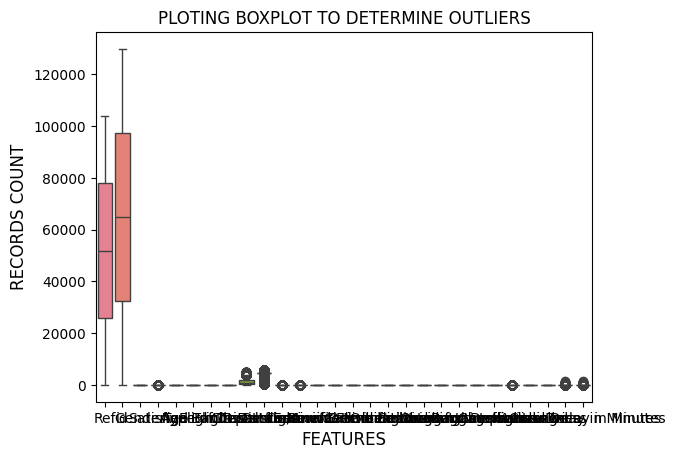

In [13]:
sns.boxplot(data= encoded_dataset_dataframe)

plt.title('PLOTING BOXPLOT TO DETERMINE OUTLIERS')
plt.xlabel("FEATURES", size=12)
plt.ylabel("RECORDS COUNT", size=12)
plt.show()

**EDA: EXPLORATORY DATA ANALYSIS**

Histogram to determine Satisified and Unstatisfied Passenger

In [16]:
fig = px.histogram(dataset_dataframe, x='Satisfied', color='Satisfied',color_discrete_sequence=['crimson'],title='Passenger Satisfaction Rate')
fig.show()

**DESCRIPTIVE STATISTICS**

**EVALUATING GENDER SATISFACTION**

In [17]:
fig = px.histogram(dataset_dataframe, x='Satisfied', color='Gender', color_discrete_sequence=px.colors.qualitative.Dark24,title='Passenger Satisfaction Rate Based on Gender')
fig.update_traces(marker_line_width=0)
fig.show()

**Linear Correlation between Arrival Delay and Flight Distance**

In [18]:
fig = px.scatter(dataset_dataframe, x="Flight Distance", y="Arrival Delay in Minutes", color_discrete_sequence=['blue'],
                 title='Flight Distance vs Arrival Delay', template='plotly_dark')
fig.show()

BarChart to Understand

In [19]:
# Group by 'Satisfied' and 'Class' and count occurrences
count_data = dataset_dataframe.groupby(['Satisfied', 'Class']).size().reset_index(name='Count')

# Developing a bar chart
fig = px.bar(count_data, x='Satisfied', y='Count', color='Class',
             title='Count of Satisfied Passengers by Class',
             barmode='group', template='plotly_dark')

fig.show()


**AGE DISTRIBUTION ANALYSIS**


In [20]:
fig = px.histogram(dataset_dataframe, x='Age', nbins=30, color_discrete_sequence=['yellow'],
                   title='Age Distribution', template='plotly_dark')
fig.update_traces(marker_line_color='black', marker_line_width=0.5)
fig.update_layout(xaxis_title='Age', yaxis_title='Count')
fig.show()

In [23]:
#dataset_dataframe['age band'] = pd.cut(dataset_dataframe.Age,
                             # bins=[0, 17, 24, 34, 44, 54, 64, 999],
                             # labels=['under 18', '18-24', '25-34', '35-44', '45-54', '55-64', '65 or over'],
                             # include_lowest=True)

# **FUll Histogram VISUALIZATION**

**for all features to determine whether is Regression or Classification Problem**


array([[<Axes: title={'center': 'Ref'}>, <Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Satisfied'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Age Band'}>,
        <Axes: title={'center': 'Type of Travel'}>,
        <Axes: title={'center': 'Class'}>,
        <Axes: title={'center': 'Flight Distance'}>,
        <Axes: title={'center': 'Flight Distance Rounded'}>],
       [<Axes: title={'center': 'Destination'}>,
        <Axes: title={'center': 'Continent'}>,
        <Axes: title={'center': 'Inflight wifi service'}>,
        <Axes: title={'center': 'Departure/Arrival time convenient'}>,
        <Axes: title={'center': 'Ease of Online booking'}>],
       [<Axes: title={'center': 'Gate location'}>,
        <Axes: title={'center': 'Food and drink'}>,
        <Axes: title={'center': 'Online boarding'}>,
        <Axes: title={'center': 'Seat comfort'}>,
        <Axes: title={'center': 'Inflight ent

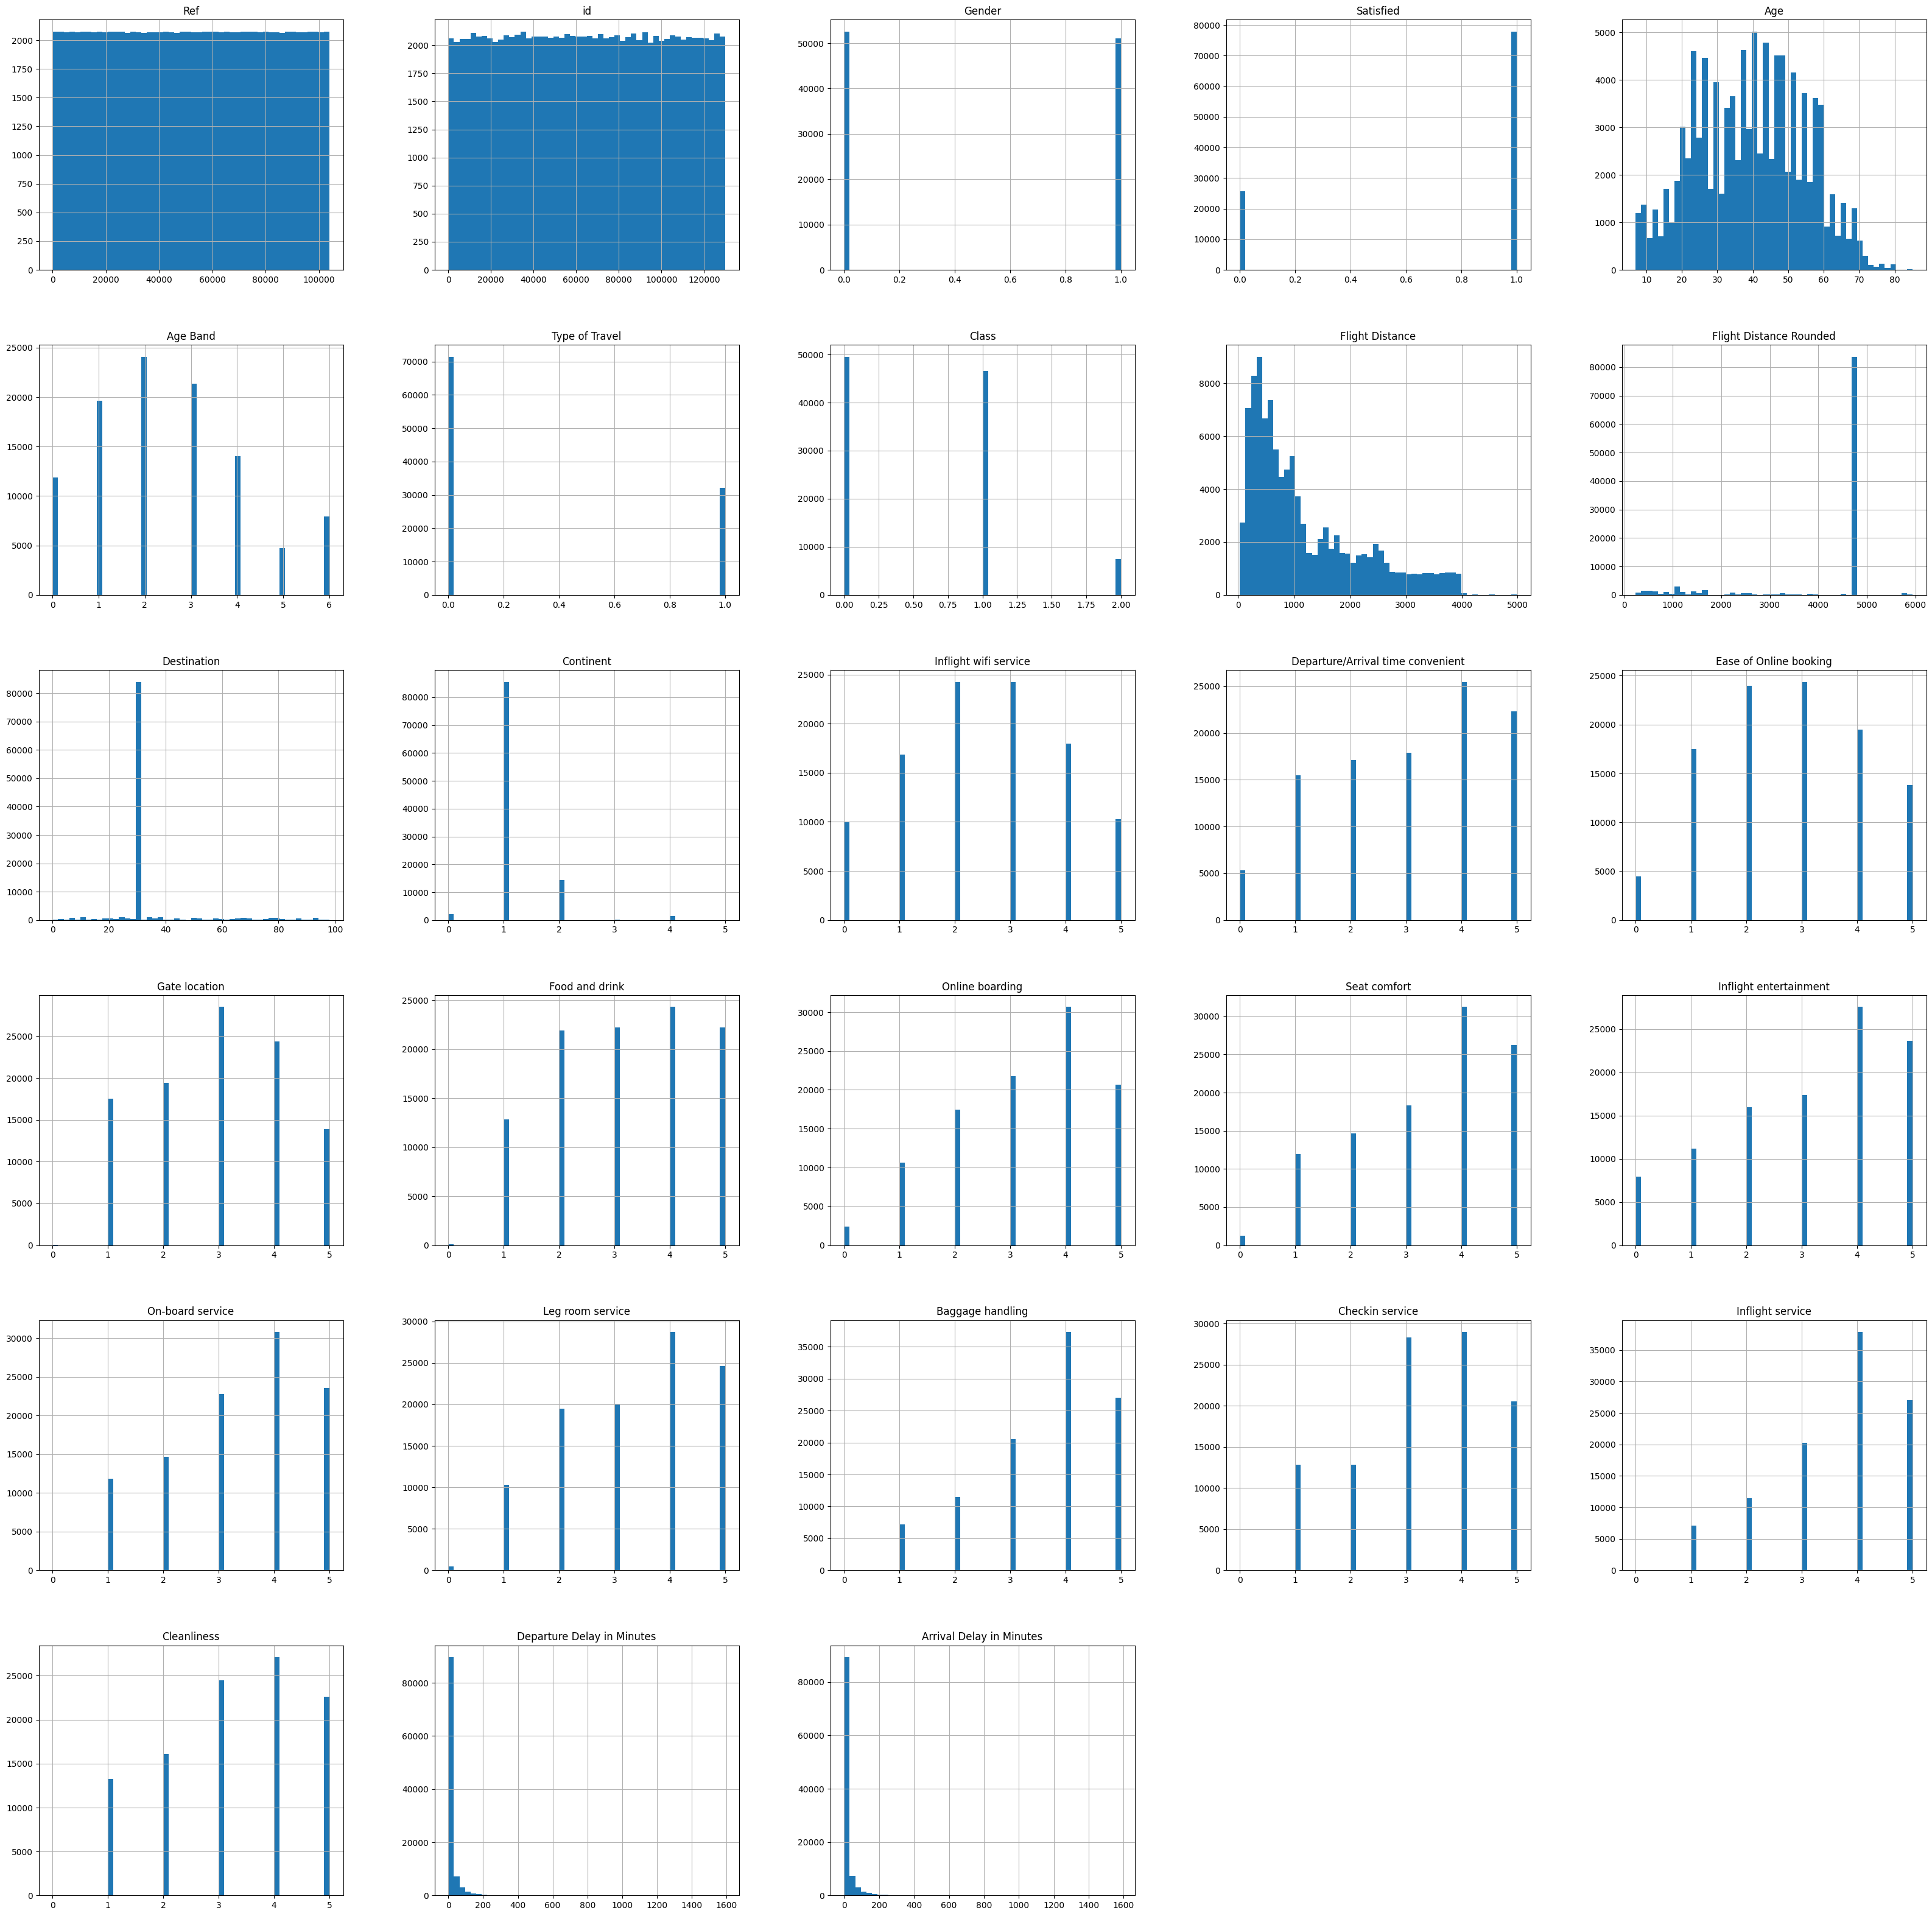

In [21]:
encoded_dataset_dataframe.hist(bins=50,figsize=(40,40))

# **HeatMap or Correlation Matrix**

The project determine whether the Features are Linear or NOn-Linear Correlation

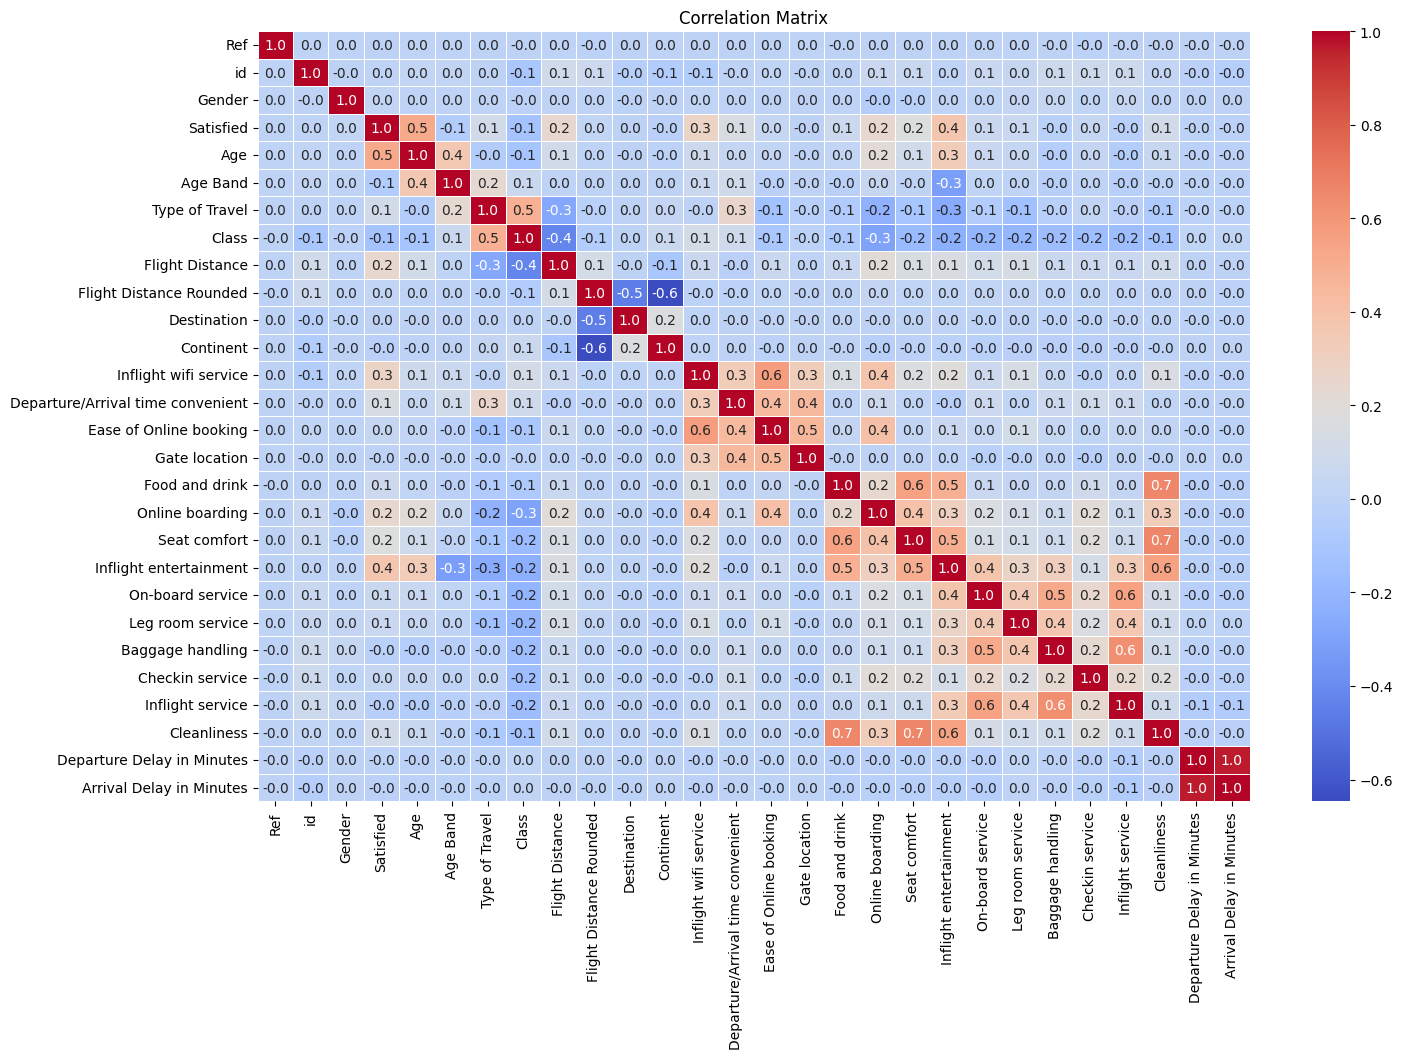

In [22]:
corr_matrix2 = encoded_dataset_dataframe.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix2, annot=True, fmt= '0.1f', cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.savefig("corr.png")

plt.show()

# **Correlation Features based on satisfied field to determine predictive model type**

In [23]:
# The Correlation of the features to the targeted variable (Satisfied)

corr_matrix2['Satisfied'].sort_values(ascending=False)

Satisfied                            1.000000
Age                                  0.523624
Inflight entertainment               0.373361
Inflight wifi service                0.274004
Online boarding                      0.243297
Flight Distance                      0.241021
Seat comfort                         0.173896
Departure/Arrival time convenient    0.140725
Type of Travel                       0.104911
Cleanliness                          0.102478
Food and drink                       0.072678
On-board service                     0.065770
Leg room service                     0.058116
Ease of Online booking               0.038771
Checkin service                      0.037579
Gender                               0.028320
Flight Distance Rounded              0.024848
id                                   0.004223
Ref                                  0.002612
Destination                          0.001721
Gate location                       -0.000705
Departure Delay in Minutes        

# **CLASSIFICATION MODEL**

**ABABOOST AND DECISION TREE WERE CONSIDERED**

Split Features and target Varriable

In [24]:
#encoded_dataset_dataframe = encoded_dataset_dataframe.reset_index()
X_AdaBoost = encoded_dataset_dataframe.drop(columns=[ "id","Ref", "Satisfied"])
y_AdaBoost = encoded_dataset_dataframe["Satisfied"]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_AdaBoost, y_AdaBoost, test_size=0.2, random_state=42)

In [27]:
# AdaBoost model
AdaBoost_model = AdaBoostClassifier(n_estimators=50, random_state=42)
AdaBoost_model.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

Predict the Y trained data

In [28]:
y_pred = AdaBoost_model.predict(X_test)

In [29]:
AdaBoost_class_report = classification_report(y_test, y_pred)
print("Ada Boost Classification Report:")
print(AdaBoost_class_report)
#the project will still need ytest and ypred in future when evaluating models , therefore we keep them to another varriables
AdaBoosty_test = y_test
AdaBoosty_pred = y_pred

Ada Boost Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90      5084
           1       0.96      0.98      0.97     15635

    accuracy                           0.95     20719
   macro avg       0.94      0.93      0.94     20719
weighted avg       0.95      0.95      0.95     20719



In [30]:
AdaBoost_accuracy = accuracy_score(y_test, y_pred)
AdaBoost_accuracy

0.9529417442926782

Ada Boost Confusion Matrix

In [32]:
AdaBoost_cm = confusion_matrix(y_test, y_pred)

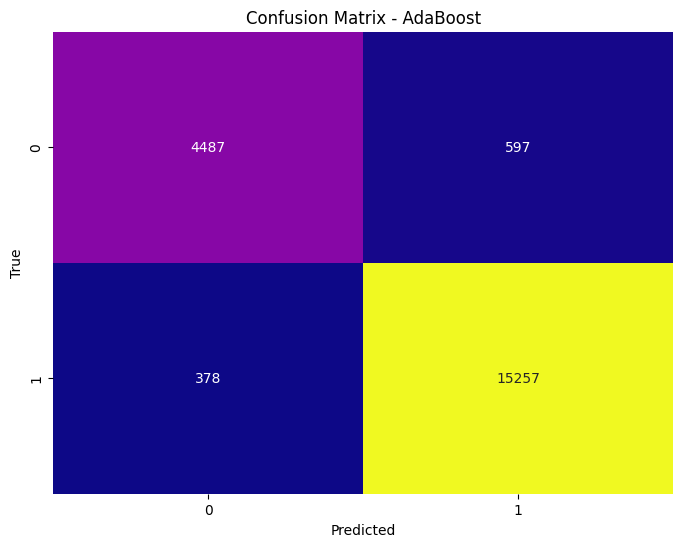

In [33]:
plt.figure(figsize=(8, 6))
sns.heatmap(AdaBoost_cm, annot=True, fmt='d', cmap='plasma', cbar=False)
plt.title('Confusion Matrix - AdaBoost')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# **Decision Tree as  the second Model**

In [34]:
#from sklearn.tree import DecisionTreeClassifier

In [35]:
#take note id , ref are unque numbers that can only come once in a dataset,therefore they are going to be removed and will not be part of our features
X_DecisionTree = encoded_dataset_dataframe.drop(columns=[ "id","Ref", "Satisfied"])
y_DecisionTree = encoded_dataset_dataframe["Satisfied"]

In [36]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_DecisionTree, y_DecisionTree, test_size=0.2, random_state=42)

In [37]:
# Initialize Decision Tree Classifier
DecisionTree_classifier = DecisionTreeClassifier()

In [38]:
# Fit the model on training data
DecisionTree_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [39]:
# Make predictions on the testing data
y_pred = DecisionTree_classifier.predict(X_test)

In [40]:
# Calculate accuracy
DecisionTree_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", DecisionTree_accuracy)

Accuracy: 0.984941358173657


In [41]:
DecisionTree_class_report = classification_report(y_test, y_pred)

# Print classification report
print("Classification Report:")
print(DecisionTree_class_report)
#the project needs to keep another varriable for future use on this source code
DecisionTreey_test = y_test
DecisionTreey_pred = y_pred

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5084
           1       0.99      0.99      0.99     15635

    accuracy                           0.98     20719
   macro avg       0.98      0.98      0.98     20719
weighted avg       0.98      0.98      0.98     20719



In [56]:
#DecisionTree_cm = confusion_matrix(y_test, y_pred)

In [42]:
DecisionTree_confusionMatrix= confusion_matrix(y_test, y_pred)
print(DecisionTree_confusionMatrix)
accuracy_score(y_test, y_pred)

[[ 4938   146]
 [  166 15469]]


0.984941358173657

Plot the Graph for Decision tree confusion Matrix

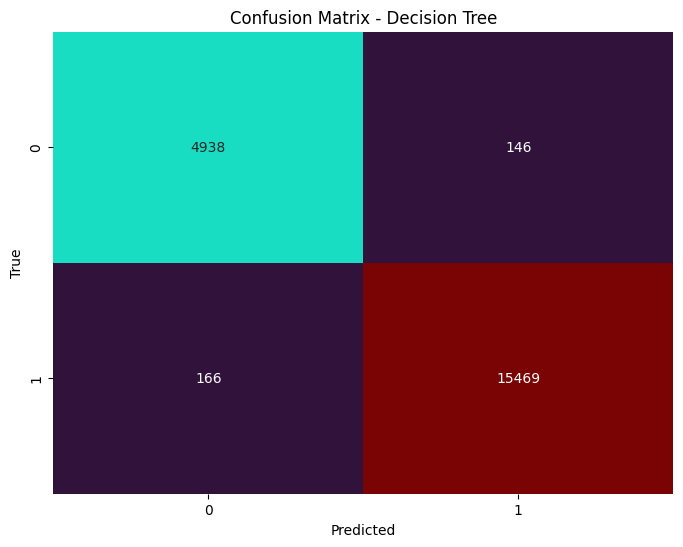

In [43]:
plt.figure(figsize=(8, 6))
sns.heatmap(DecisionTree_confusionMatrix, annot=True, fmt='d', cmap='turbo', cbar=False)
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [72]:
print(y_test)

18595    1
19336    1
72501    1
85210    1
87824    1
        ..
13497    1
59583    1
84966    1
44109    0
43853    1
Name: Satisfied, Length: 20719, dtype: int8


In [73]:
y_pred

array([1, 1, 1, ..., 1, 0, 1], dtype=int8)

# **EVALUATION AND COMPARISON OF THE TWO MODELS**

---




In [45]:
comparison_table = pd.DataFrame({
'Model': ['Adaboost','Decison Tree '],
'Accuracy': [AdaBoost_accuracy, DecisionTree_accuracy]
})
print("Models Comparison Table")
print(comparison_table)


Models Comparison Table
           Model  Accuracy
0       Adaboost  0.952942
1  Decison Tree   0.984941


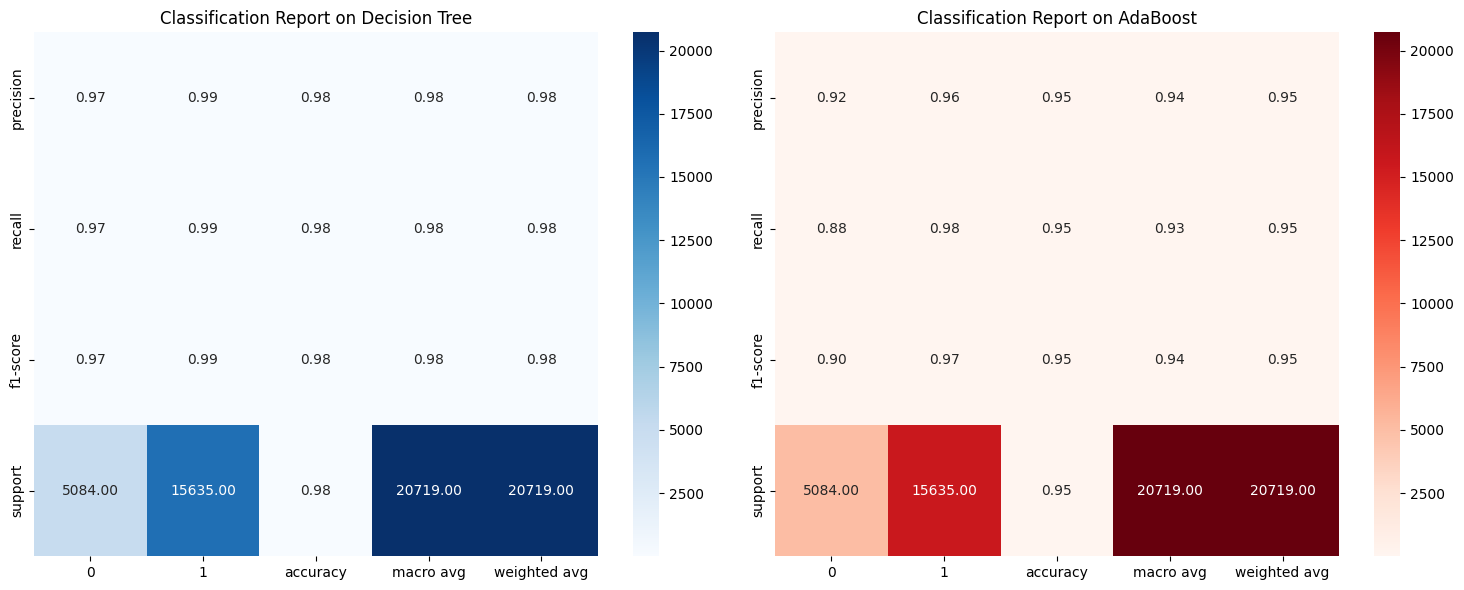

In [47]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.heatmap(pd.DataFrame.from_dict(classification_report(DecisionTreey_test, DecisionTreey_pred, output_dict=True)), annot=True, cmap='Blues', fmt=".2f")
plt.title("Classification Report on Decision Tree")

plt.subplot(1, 2, 2)
sns.heatmap(pd.DataFrame.from_dict(classification_report(AdaBoosty_test, AdaBoosty_pred, output_dict=True)), annot=True, cmap='Reds', fmt=".2f")
plt.title("Classification Report on AdaBoost")

plt.tight_layout()
plt.show()

CONFUSION MATRIX

Confusion Matrix Comparison


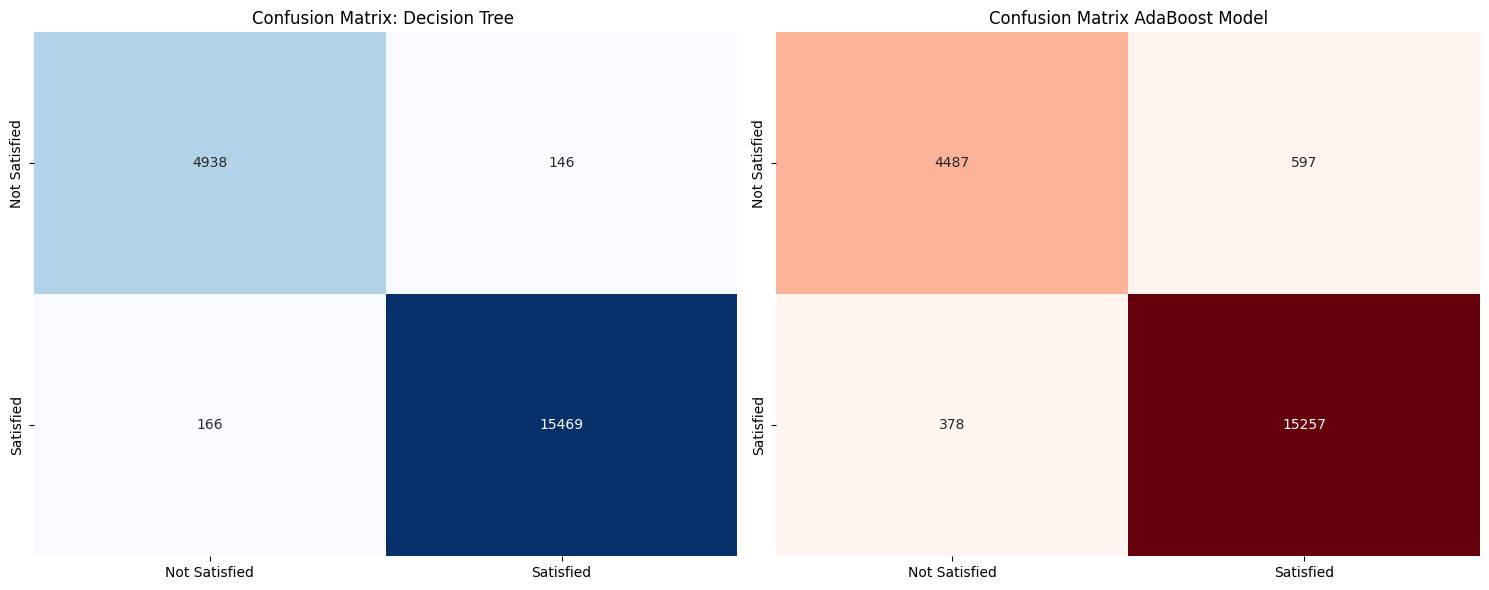

In [48]:
plt.figure(figsize=(15, 6))
print("Confusion Matrix Comparison")
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(DecisionTreey_test, DecisionTreey_pred), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Satisfied', 'Satisfied'], yticklabels=['Not Satisfied', 'Satisfied'])
plt.title("Confusion Matrix: Decision Tree ")

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(AdaBoosty_test, AdaBoosty_pred), annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=['Not Satisfied', 'Satisfied'], yticklabels=['Not Satisfied', 'Satisfied'])
plt.title("Confusion Matrix AdaBoost Model")

plt.tight_layout()
plt.show()